https://brendanhasz.github.io/2018/10/10/hmm-vs-gp.html

In [ ]:
import numpy
import pandas
from matplotlib import pyplot, cm
import scipy

from scipy.stats import multivariate_normal


Intro:

As the name suggests, the Gaussian distribution (which is often also referred to as normal distribution) is the basic building block of Gaussian processes. In particular, we are interested in the multivariate case of this distribution, where each random variable is distributed normally and their joint distribution is also Gaussian. 

# Gaussian Distribution

Notes: 
- frequently used because of law of large numbers
- [nice mathematical properties(https://distill.pub/2019/visual-exploration-gaussian-processes/)

## Univariate Gaussian Distribution
Named after its discoverer, and also known as the normal distribution, the gaussian distribution is a symmetric two parameter distribution characterized by $\mu$ and $\sigma^2$ representing the mean and standard deviation of the distribution of $x$ respectively.

The equation is formally defined by the following equation

$$ \phi(x)=\frac{1}{\sigma \sqrt{ 2 \pi}}e^{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right) ^2}  $$

Where $x$ is some vector of numbers such that $x := [x_1, x_2, x_3, \cdots, x_n]$

It yields the following probability density functions $\phi$ and cumulative distribution functions $\Phi$ respectively:

<table>
    <tr>
        <td>
            <img src='images/normal_pdf.png'>
        </td>
        <td>
            <img src='images/normal_cdf.png'>
        </td>
    </tr>
</table>

For more information consult this [wikipedia article](https://en.wikipedia.org/wiki/Normal_distribution)

## Multivariate Gaussian Distribtuition
The multivariate gaussian distribution is a generalization of the univariate distribution. It gives the probability that multiple variables take on specific values (ie. p(A and B)).



### Notes On The Approaches (clarify etc)

To my knowledge, there are two primary approaches
to developing the theory of multivariate Gaussian distributions. The first, and by
far the most common approach in machine learning textbooks, is to define the
multivariate gaussian distribution in terms of its density function, and to derive
results by manipulating these density functions. With this approach, a lot of the
work turns out to be elaborate matrix algebra calculations happening inside the
exponent of the Gaussian density. One issue with this approach is that the multivariate Gaussian density is only defined when the covariance matrix is invertible.
To keep the derivations rigorous, some care must be taken to justify that the new
covariance matrices we come up with are invertible. For my taste, I find the rigor in
our textbooks to be a bit light on these points. We’ve included the proof to Theorem 4 to give a flavor of the details one should add. The second major approach to
multivariate Gaussian distributions does not use density functions at all and does
not require invertible covariance matrices. This approach is much cleaner and more
elegant, but it relies on the theory of characteristic functions and the Cramer-Wold
device to get started, and these are beyond the prerequisites for this course. You
can often find this development in more advanced probability and statistics books,
such as Rao’s excellent Linear Statistical Inference and Its Applications (Chapter
8).

https://davidrosenberg.github.io/mlcourse/in-prep/multivariate-gaussian.pdf

### Matrix Notation Refresher
As such the parameters of the distribution need to be replaced with their multivariate matrix notation counterparts $\mu$ and $\Sigma$. In matrix notation we let each column represent an individual variable and thus the rows represent the values of the variables for a coresponding observation. Given $n$ dimensions and $m$ observations we would have:

$$X := [X_1, X_2, X_3, \cdots, X_n]$$

$$\mu := [\mu_1, \mu_2, \mu_3, \cdots, \mu_m]$$ 

$$\Sigma := \begin{bmatrix}
\sigma_1^2   & \dots & \sigma_{1,m}\\
\sigma_{2,1} & \dots & \sigma_{1,m} \\
\vdots       & \ddots & \vdots \\
\sigma_{n,1}   & \dots & \sigma_{n,m}
\end{bmatrix}
$$

Note: $\Sigma$ is commonly referred to as the covariance matrix.

$$ \phi := \mathcal{N}(\mu, \Sigma) $$

** Incliudethe part that we can swap between conditional and joint distrubtuions by changing the parameters!!

## Covariance is important
its a contraint that keeps like terms together
https://ekamperi.github.io/mathematics/2021/03/30/gaussian-process-regression.html

Matrix being positive definite This is the multivariate analog of the univariate requirement for the variance σ2 to be positive. 
https://ekamperi.github.io/mathematics/2021/03/30/gaussian-process-regression.html

Probability rules:
    https://machinelearningmastery.com/bayes-theorem-for-machine-learning/

## Intuition For Joint Probability Distributions

Multivariate distributions are also commonly referred to as [joint probability distributions](https://en.wikipedia.org/wiki/Joint_probability_distribution) meaning that it yields the probability that $n$ variables yield a given value within an $n$-dimensional space. As a probability distribution it can also be expressed as both a PDF and CDF.


Visually, the distribution is centered around the mean and the covariance matrix defines its shape around the mean. 

Let's examine the two dimensional case. 

If the underlying distributions independant ($X_1 \perp  X_2$ we will have a covariance matrix such that $\Sigma = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
$ and we will see that the two dimensional space is a circle:

In [1]:
%matplotlib widget

In [2]:
from ipywidgets import Text
Text("Hello")

Text(value='Hello')

In [ ]:
visuals: https://distill.pub/2019/visual-exploration-gaussian-processes/#DimensionSwap

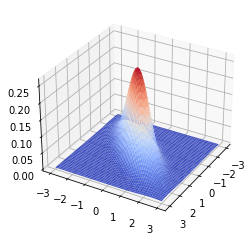

In [5]:
import numpy
import pandas
from matplotlib import pyplot, cm
import scipy

from scipy.stats import multivariate_normal

mu = [0, 0]
sigma = numpy.array([[1, 0.8],[0.8, 1]])

x = numpy.linspace(-3, 3, 200)
y = numpy.linspace(-3, 3, 200)
x, y = numpy.meshgrid(x, y)
grid_coord = numpy.dstack((x,y))

rv = multivariate_normal(mu, sigma)
z = rv.pdf(grid_coord)

fig = pyplot.figure()
ax = fig.gca(projection='3d')
#ax.plot_wireframe(x,y,z, cmap=cm.coolwarm)
ax.plot_surface(x,y,z, cmap=cm.coolwarm)
ax.view_init(30, 30)

pyplot.show()

multivariate gaussian plot: https://www.ritchievink.com/blog/2019/02/01/an-intuitive-introduction-to-gaussian-processes/

In [ ]:
xv

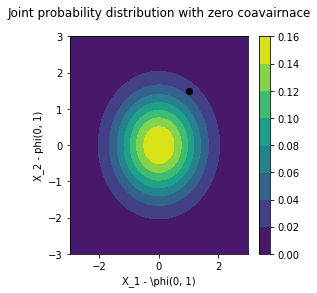

In [183]:
import numpy
from scipy.stats import multivariate_normal
from matplotlib import pyplot

# Generate a random normal variable which we will use to calculate probabilities
mu = [0, 0]
sigma = numpy.array([[1, 0],[0,1]])
rv = multivariate_normal(mu, sigma)

# Generate a 2D meshgrid
#    https://www.geeksforgeeks.org/numpy-meshgrid-function/
xv, yv = numpy.meshgrid(numpy.linspace(-3, 3, 200), numpy.linspace(-3, 3, 200))

# Transform into a list of coordinates
grid_coord = numpy.dstack((xv, yv))

# Calculate probabilities for each coordinate pair
prob_coord = rv.pdf(grid_coord)

# Create an object to hold our visuals and set the dimensions and labels
fig, ax = pyplot.subplots()
fig.set_figwidth(4)
fig.set_figheight(4)
ax.set_title('Joint probability distribution with zero coavairnace', pad=20)
ax.set_xlabel('X_1 - \phi(0, 1)')
ax.set_ylabel('X_2 - phi(0, 1)')
pyplot.xlim([-3, 3])
pyplot.ylim([-3, 3])

# Plot the countour map, color bar, and point
contour = ax.contourf(xv, yv, prob_coord, cmap=pyplot.rcParams['image.cmap'])
color_bar = pyplot.colorbar(contour)
ax.scatter(1,1.5,c='black');

If we look at an arbitrary point where $X_1 = 1$ and $X_2 = 1.5$ we see this point falls towards the top right of the space and would have a lower probability than that of the center.

If there is an asymmetry and one distribution has a larger standard deviation than the other we will see the space stretches in that dimension. In our case the $X_2$ is such that $\sigma_2=5$. We see the probability of our point has increased.

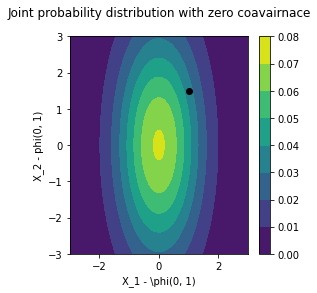

In [184]:
import numpy
from scipy.stats import multivariate_normal
from matplotlib import pyplot

# Generate a random normal variable which we will use to calculate probabilities
mu = [0, 0]
sigma = numpy.array([[1, 0],[0,5]])
rv = multivariate_normal(mu, sigma)

# Generate a 2D meshgrid
#    https://www.geeksforgeeks.org/numpy-meshgrid-function/
xv, yv = numpy.meshgrid(numpy.linspace(-3, 3, 200), numpy.linspace(-3, 3, 200))

# Transform into a list of coordinates
grid_coord = numpy.dstack((xv, yv))

# Calculate probabilities for each coordinate pair
prob_coord = rv.pdf(grid_coord)

# Create an object to hold our visuals and set the dimensions and labels
fig, ax = pyplot.subplots()
fig.set_figwidth(4)
fig.set_figheight(4)
ax.set_title('Joint probability distribution with zero coavairnace', pad=20)
ax.set_xlabel('X_1 - \phi(0, 1)')
ax.set_ylabel('X_2 - phi(0, 1)')
pyplot.xlim([-3, 3])
pyplot.ylim([-3, 3])

# Plot the countour map, color bar, and point
contour = ax.contourf(xv, yv, prob_coord, cmap=pyplot.rcParams['image.cmap'])
color_bar = pyplot.colorbar(contour)
ax.scatter(1,1.5,c='black');

If the two distrinutions co-vary meaning that the $X_1$ and $X_2$ are not strictly independent, we see that the space again stetches, but not along either dimension. It becomes skewed to the right indicating that similar values between $X_1$ and $X_2$ are expected to occur more frequently. As the covariance increases, the "width" of the space will continue to shrink while the length continues to increase.

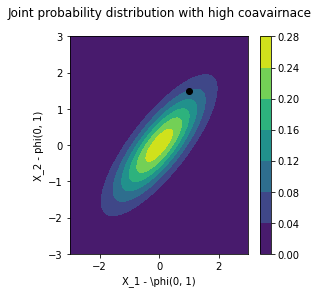

In [185]:
import numpy
from scipy.stats import multivariate_normal
from matplotlib import pyplot

# Generate a random normal variable which we will use to calculate probabilities
mu = [0, 0]
sigma = numpy.array([[1, 0.8],[0.8,1]])
rv = multivariate_normal(mu, sigma)

# Generate a 2D meshgrid
#    https://www.geeksforgeeks.org/numpy-meshgrid-function/
xv, yv = numpy.meshgrid(numpy.linspace(-3, 3, 200), numpy.linspace(-3, 3, 200))

# Transform into a list of coordinates
grid_coord = numpy.dstack((xv, yv))

# Calculate probabilities for each coordinate pair
prob_coord = rv.pdf(grid_coord)

# Create an object to hold our visuals and set the dimensions and labels
fig, ax = pyplot.subplots()
fig.set_figwidth(4)
fig.set_figheight(4)
ax.set_title('Joint probability distribution with high coavairnace', pad=20)
ax.set_xlabel('X_1 - \phi(0, 1)')
ax.set_ylabel('X_2 - phi(0, 1)')
pyplot.xlim([-3, 3])
pyplot.ylim([-3, 3])

# Plot the countour map, color bar, and point
contour = ax.contourf(xv, yv, prob_coord, cmap=pyplot.rcParams['image.cmap'])
color_bar = pyplot.colorbar(contour)
ax.scatter(1,1.5,c='black');

Conversely a negative covariance would skew towards the left.

## Intuition For Conditional Probability Distributions

A conditional probability is one that expresses the probability of an outcome A given that an outcome B has already occured. This is expressed mathematically as $p(A|B)$.

It is possible to derive a conditional probability distribution from a joint distribution. Using the definition of conditional probability we have:

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$

Recall the relationship between union ($\cup$) and intersection ($\cap$) shown visually below:

<table>
    <tr>
        <td>
            <img src='images/a_union_b.png' height='200px' width='200px'>
        </td>
        <td>
            <img src='images/a_intersect_b.png' height='200px' width='200px'>
        </td>
    </tr>
</table>

For example, looking at the bi-variate example from the previous section, we could take a slice (either vertically or horizontally) such that one of the variables is frozen at a given value. Below we see a multivariate joint distribution for a non-independent pair of variables in the bottom left and the univariate probability density functions for each variable.

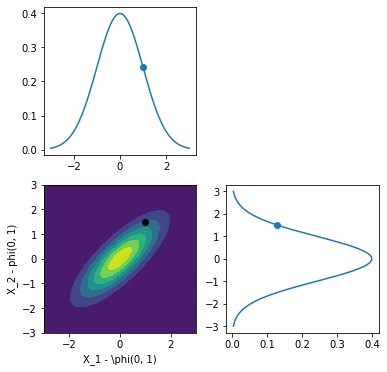

In [186]:
import numpy
from scipy.stats import multivariate_normal
from matplotlib import pyplot

# Generate a random normal variable which we will use to calculate probabilities
mu = [0, 0]
sigma = numpy.array([[1, 0.8],[0.8,1]])
rv = multivariate_normal(mu, sigma)

# Generate a 2D meshgrid
#    https://www.geeksforgeeks.org/numpy-meshgrid-function/
xv, yv = numpy.meshgrid(numpy.linspace(-3, 3, 200), numpy.linspace(-3, 3, 200))

# Transform into a list of coordinates
grid_coord = numpy.dstack((xv, yv))

# Calculate probabilities for each coordinate pair
prob_coord = rv.pdf(grid_coord)

# Create an object to hold our visuals and set the dimensions and labels
fig, ax = pyplot.subplots(2, 2)
fig.set_figwidth(6)
fig.set_figheight(6)

# Hide the unused subplot
ax[0][1].axis('off')

# Plot the pdf for X1 and X2
x = numpy.linspace(-3, 3, 200)
dist = scipy.stats.norm(loc=0, scale=sigma[0][0])
y = dist.pdf(x)
ax[0][0].plot(x, y)
ax[0][0].scatter(1, dist.pdf(1))

x = numpy.linspace(-3, 3, 200)
dist = scipy.stats.norm(loc=0, scale=sigma[1][1])
y = dist.pdf(x)
ax[1][1].plot(y, x)
ax[1][1].scatter(dist.pdf(1.5), 1.5)


#ax[1][0].set_title('Joint probability distribution with high coavairnace', pad=20)
ax[1][0].set_xlabel('X_1 - \phi(0, 1)')
ax[1][0].set_ylabel('X_2 - phi(0, 1)')
#pyplot.xlim([-3, 3])
#pyplot.ylim([-3, 3])

# Plot the countour map, color bar, and point
contour = ax[1][0].contourf(xv, yv, prob_coord, cmap=pyplot.rcParams['image.cmap'])
#color_bar = pyplot.colorbar(contour, ax=ax[1][0])
ax[1][0].scatter(1,1.5,c='black');

We will take a vertical slice and fix $X_1$ with a value of 1 to look at how the probability distribution has shifted.

In [ ]:
import numpy
from scipy.stats import multivariate_normal
from matplotlib import pyplot

# Generate a random normal variable which we will use to calculate probabilities
mu = [0, 0]
sigma = numpy.array([[1, 0.8],[0.8,2]])
rv = multivariate_normal(mu, sigma)

# Generate a number line
x = numpy.linspace(-7, 7, 200)

# Generate probabilities for the first random variable
normal_uv_rv = scipy.stats.norm(loc=0, scale=2)
p1 = normal_uv_rv.pdf(x)
x_1 = 1
p_x_1 = normal_uv_rv.pdf(x_1)

# Generate joint probabilities with a fixed X_1
x2 = x.copy()
grid_coord = numpy.column_stack((numpy.full(x2.shape, 1), x2))
p_x2_and_x1 = rv.pdf(grid_coord)

# Generate conditional probabilities given a fixed X_1
p_x2_given_x1 = p_x2_and_x1 / p1

# Calculate the means of the distributions
i = numpy.argmax(p1)
p1_mean_x = x[i]
p1_mean = p1[i]
i = numpy.argmax(p_x2_and_x1)
p_x2_and_x1_mean_x = x[i]
p_x2_and_x1_mean = p_x2_and_x1[i]
i = numpy.argmax(p_x2_given_x1)
p_x2_given_x1_mean_x = x[i]
p_x2_given_x1_mean = p_x2_given_x1[i]

# Plot
fig, ax = pyplot.subplots()
fig.set_figwidth(6)
fig.set_figheight(6)
ax.plot(x, p1, c='black')
ax.plot(x, p_x2_and_x1, c='blue')
ax.plot(x, p_x2_given_x1, c='green')
ax.scatter(p1_mean_x, p1_mean, c='black')
ax.scatter(p_x2_and_x1_mean_x, p_x2_and_x1_mean, c='blue')
ax.scatter(p_x2_given_x1_mean_x, p_x2_given_x1_mean, c='green')
ax.legend([
    "p($X_1)$", 
    "$p(X_2 \cap X_1=1)$", 
    "$p(X_2|X_1=1)$",
    "$\mu$ = {0}".format(p1_mean_x),
    "$\mu$ = {0}".format(p_x2_and_x1_mean_x),
    "$\mu$ = {0}".format(p_x2_given_x1_mean_x)
]);

In the diagram above, we can see the the effects on the distributions as we fix a variable. We see that the distributions move to the right by looking at the means (visually indicated by the peaks) and we see that the distributions narrow by looking at the variance (visually indicated by the widths). The green distribution shows us the unconditional probability of $X_1$. This distribution will also describe the unconditional probability of $X_2$. We see this distribution of $X_2$ changes as we fix a value of $X_1=1$. 

Looking at the black distribution, we see that the probability of obtaining any value of $X_2$ and obtaining a value $X_1=1$ is generally smaller than obtaining the same value of $X_2$ independently. This intuitively makes sense as there is a smaller chance that two things happen at the same time. Intuitively this makes sense: we are multiplying a small number (smaller than one) by another small number... so we will get an even smaller number. We also see that the mean of the distribution has moved to the right. This indicates that the value $X_2$ is likely to take is somewhere around 1 rather than 0. Additionally we see that the variance of the distribution shrinks which indicates that the range of values that the variable is likely to take on is also shrinking (definition of variance).

Finally, with the green distribution, we see that the $X_2$ is most likely to take on a value of 1.23 given that $X_1=1$.

# Kernels
Stated generally, a kernel is a function that maps a multi-dimensional space to a unidimensional space. Mathematically denoted as:

$$ K : \mathcal{X}^n \rightarrow Y $$

Using functional set notation we would have

$$ K(X_1, X_2, \dots, X_n) \in Y, \ where  \ X:={X_1, X_2, \dots, X_n} $$

A kernel function typically satisfies the following two properties (but this is not required for all kernel
methods). 

<table width='600px' >
    <tr align='center'>
        <th width='100px'>
            Property
        </th>
        <th>
            Definition
        </th>
    </tr>
    <tr align='center'>
        <td>
            Symmetric
        </td>
        <td>
            $$ \forall {x_1, x_2, \dots, x_n} \in \mathcal{X}^n, 
            K(x_1, x_2, \dots, x_n) \ge 0 
            $$
        </td>
    </tr>
    <tr align='center'>
        <td>
            Non-negative
        </td>
        <td>
            $$ \forall {x_1, x_2, \dots, x_n} \in \mathcal{X}^n, 
            K(x_1, x_2, \dots, x_n) = K(x_n, \dots, x_2, x_1) 
            $$
        </td>
    </tr>
</table>

**Note:** Kernels appear in a number of mathematical fields and is often presented in an applied context with a more specific definition. They are used in image processing, interpolation, machine learning, and more. For a primer consider the following texts 
- https://www.cs.princeton.edu/~bee/courses/scribe/lec_10_09_2013.pdf
- [The kernel Cookbook](https://www.cs.toronto.edu/~duvenaud/cookbook/)

## Notable Kernels

- Periodic Kernels
- Matern Kernel

more exmpaples: https://www.cs.uic.edu/~hjin/files/bayesian_opt.pdf

### Gaussian (Squared Exponential)

$$ K(x, y) : \alpha^2 exp \left( {-\frac{(x - y)^2}{2\rho^2}} \right) + \sigma^2 \delta_{x, y} $$

The parameters are defined as follows:

- $\alpha$ - a hyper parameter which controls how likely the kernel returns a value near zero
- $\rho$
- $\sigma$
- $\delta$ - takes a value from 0 to 1 depending on whether or not 


We can look at the different shapes that the distribution will take on as the parameters change.

In [ ]:
import numpy
import itertools
from scipy.stats import multivariate_normal
from matplotlib import pyplot

def gaussian_kernel(diff, a, p, s, d):
    
    return a**2 * numpy.exp(-(diff)**2/2*p**2) + s**2 * d

def plot_variable(ax, diff, a, p, s, d):
    
    # Calculate the kernel values
    g = gaussian_kernel(diff, a, p, s, d)

# Generate a number line
diff = numpy.linspace(-5, 5, 200)

# Generate potting objects
fig, ax = pyplot.subplots(2,2)
ax = [ax[0][0],ax[0][1], ax[1][0], ax[1][1]]
fig.set_figwidth(12)
fig.set_figheight(12)
#ax.set_xlabel('x - y')
#ax.set_ylabel('K(x, y)')

params = ['a', 'p', 's', 'd']
possible_values = {
    'a': [-1, -.5, 0.1, .5, 1, 2, 5],
    's': [-1, -.5, 0.1, .5, 1, 2, 5],
    'p': [-1, -.5, 0.1, .5, 1, 2, 5],
    'd': [0, 1]
}
defaults = {
    'a': 1,
    's': 1,
    'p': 1/2,
    'd': 1
}
    
for i in range(0, len(params)):

    varied_param = params[i]
    
    # Set the defaults
    for j in range(0, len(params)):
        param_name = params[j]
        param_default = defaults[param_name]
        exec("{0} = {1}".format(param_name, param_default))
            
    legend_labels = []
    for value in possible_values[varied_param]:

        # Set the value of the variable that will be varried
        exec("{0} = {1}".format(varied_param, value))
                
        # Calculate the kernel values
        g = gaussian_kernel(diff, a, p, s, d)

        # Get the axis
        ax[i].plot(diff, g)
        
        legend_labels.append("a={0}, p={1}, s={2}, d={3}".format(a, p, s, d))
        
        ax[i].set_title(varied_param)
        
    ax[i].legend(legend_labels);

In [ ]:
        
        # plot
        if line_count < 10:
            ax.plot(diff, g)
        elif line_count < 20:
            ax.plot(diff, g, '--')
        elif line_count < 30:
            ax.plot(diff, g, '.')
        else:
            ax.plot(diff, g)

    legend_labels.append("a={0}, p={1}, s={2}, d={3}".format(a, p, s, d))
    
    line_count += 1
    
ax.legend(legend_labels);

In [ ]:
def gaussian_kernel(diff, a, p, s, d):
    
    return a**2 * numpy.exp(-(diff)**2/2*p**2) + s**2 * d


import numpy
import itertools
from scipy.stats import multivariate_normal
from matplotlib import pyplot

# Generate a number line
diff = numpy.linspace(-5, 5, 200)

# Generate potting objects
fig, ax = pyplot.subplots()
fig.set_figwidth(12)
fig.set_figheight(12)
ax.set_xlabel('x - y')
ax.set_ylabel('K(x, y)')

# Set the hyperparameters
possible_parameter_values = [0.1, 0.5, 1, 1.5, 2, 3]
permutations = itertools.combinations_with_replacement(possible_parameter_values, r=4)

legend_labels = []
line_count = 0
for permutation in permutations:
    
    a, p, s, d = permutation
    
    # Calculate the kernel values
    g = gaussian_kernel(diff, a, p, s, d)
    
    # Ignore those which do not behave like a probability distribution
    if g[numpy.argmax(g)] > 1:
        continue

    # plot
    if line_count < 10:
        ax.plot(diff, g)
    elif line_count < 20:
        ax.plot(diff, g, '--')
    elif line_count < 30:
        ax.plot(diff, g, '.')

    legend_labels.append("a={0}, p={1}, s={2}, d={3}".format(a, p, s, d))
    
    line_count += 1
    
ax.legend(legend_labels);

In [ ]:
line_count

# Kernels and Covariance

The covariance is such that the value returned is large if the values of the random variables are close to each other and small if they are not. It is defined mathematically as:

$$ Cov(X, Y) = E \left[(X - \mu_X)(Y-\mu_y) \right] $$
$$ = E[XY] - \mu_X \mu_Y $$

It is often derived as

$$ = \frac{\sum (X - \mu_X)(Y-\mu_y)}{n} $$

Knowing these are gaussian processes we assert $\mu=0$ which implies

$$ = \frac{\sum XY}{n} $$

For a single point, where $n=1$ we can further reduce the equation to

$$ = XY $$

We can think of the covariance matrix as a function which accepts a set of independent variables and returns their covariance:

$$ \Sigma = f(x, y) $$


We can see that this function satisfies the properties of a kernel function and thus we can say the covariance function is a kernel function

$$ \Sigma = K(x, y) $$

## Choosing an alternate kernel

We could select an alternate function which returns a different measurement based on the relationship between the vairable pair.

For example, we could choose a function which describes the distance between the two variables without consideration of the respective means. We could additionally choose a function that behaves like a probability distribution and returns a quasi-probability indicating the likelihood of obtaining a value of one variable given another variable.

The gaussian kernel does just this.

Graph showing impact of different kernels

<center><img src='images/kernels_affecting_gaussian_process.png'  width='800px' height='800px' ></center>

https://ekamperi.github.io/mathematics/2021/03/30/gaussian-process-regression.html

# Distribution Of Functions

We are all familair with a (probability) distribution (of points). The distribution yields the probability of observing the point when taking a sample (doing random sampling).

A distribution of functions, sometimes referred to as a distribution over functions is a similar concept. Rather than a sample yielding a probability of obtaining a point, it yields the probability of a function.



## Stochastic Processes as Distributions Over Functions

### Refresher: A Stochastic (random) variable
Consider a stochastic (random) variable $X$. It is capable of "realizing" (ie. taking on, yielding, retunring, etc.) any value within a range of values. Additionally it is non deterministic meaning that it is capable of generating different values assuming that multiple observations are made. A classical example used to describe a random variable is a fair-sided coin or fair=sided die. When we flip a coin or roll the dice, we dont know exactly what value will be realized. We try to explain our expecation for what values can be observed and how likely those observations would be using a probability distribution.

$$ X = \{x_i\} $$

### Refrsher: A Stochastic (random) Process

A process is a collection of variables that are indexed. 

$$ X = \{X_i\}_{i \in I} $$

Continuing with the example above, a classical example would be time. The random process would be a series of observations through time of a random variable. for example, flipping a coin three times or rolling a dice six times.

Below we see a graph representing dice rolls over time

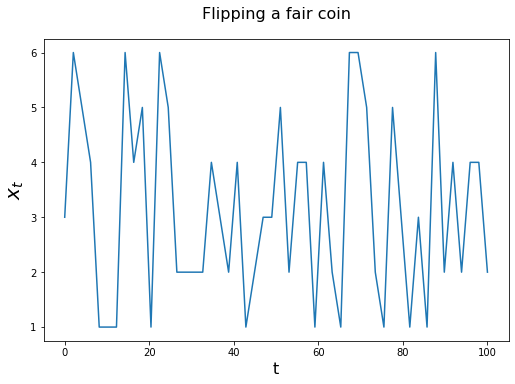

In [69]:
from matplotlib import pyplot
import numpy

numpy.random.seed(42)
x = numpy.linspace(0, 100)
y = [int(numpy.random.uniform(1, 7)) for i in x]

# Generate potting objects
px = 1/pyplot.rcParams['figure.dpi']  # pixel in inches
fig, ax = pyplot.subplots(figsize=(600*px, 400*px))
ax.plot(x,y)
ax.set_xlabel('t', size=16)
ax.set_ylabel('$x_t$', size=20)
ax.set_title("Flipping a fair coin", pad=20 , size=16)
pyplot.show()

In these examples the process in not recursive and does not depend on the index. The coin is not more or less likely to land heads based on the result of the previous coin toss. Becuase each of the events are independent it would be indistinguishable whether the realizations are from $X$ or some other variable $Y$ which conforms to the same statistical properties.

In other examples however, the process is recursive. And in many practical applications the index is time. These types of processes are typically referred to as time-dependent as the values $x_{t}$ that a variable in the collection can realize at any point in time depend on the previously realized values $x_{t-1}$. As such, it does not make sense to think that each observation could come from *any* variable $Y$. As we move through time, we are constrained to say that we are dealing with the same $X$. We are interested in a specific coin/die not any!

For example consider the brownian motion defined formally as a vairble $X$ inddexed through time $t$.

$$ X_t = \mu t  + \sigma \mathcal{W} $$

In the graph below we see the result of constructing an experiment where we observe the brownian motion over time.

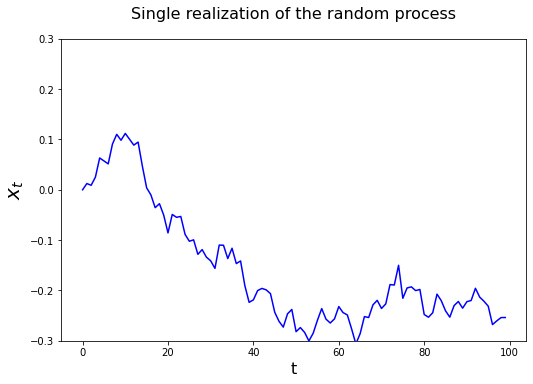

In [143]:
from scipy.stats import norm
from matplotlib import pyplot
import numpy

# Process parameters
delta = 0.5
dt = 0.1
n = 20

# Initial condition.
y_0 = 0.0

# Setup data containers
x = numpy.arange(0, 100)
y = numpy.array([y_0])

# Iterate to compute the steps of the Brownian motion.
numpy.random.seed(seed=42)
for i in range(1, len(x)):
    y = numpy.append(y, y[i - 1] + norm.rvs(scale=delta**2*dt))
    
# Generate potting objects
px = 1/pyplot.rcParams['figure.dpi']  # pixel in inches
fig, ax = pyplot.subplots(figsize=(600*px, 400*px))
ax.plot(x,y,color='blue')
ax.set_ylim([-0.3, 0.3])
ax.set_xlabel('t', size=16)
ax.set_ylabel('$x_t$' , size=20)
ax.set_title("Single realization of the random process", pad=20, size=16)
pyplot.show()

Again, this graph is a realization of a process. It is the observed values from a particular experiment. If we observer the proccess during another experiment we may not see the same results. In the graph below we see such a situation. We conduct multiple experiments to observe the same process on separate occasions.

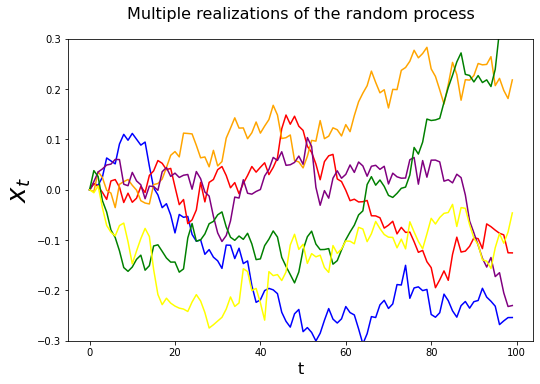

In [144]:
# Setup data containers
for j in range(1, c):
    y = numpy.vstack([y, numpy.zeros(x.shape[0])])

# Iterate to compute the steps of the Brownian motion.
numpy.random.seed(seed=42)
for i in range(1, len(x)):
    for j in range(1, c):
        y[j][i] = y[j][i - 1] + norm.rvs(scale=delta**2*dt)
    
# Generate potting objects
colors = ['blue', 'red', 'orange', 'purple', 'green', 'yellow']
px = 1/pyplot.rcParams['figure.dpi']  # pixel in inches
fig, ax = pyplot.subplots(figsize=(600*px, 400*px))
for j in range(0, c):
    ax.plot(x,y[j], color=colors[j])
ax.set_ylim([-0.3, 0.3])
ax.set_xlabel('t', size=16)
ax.set_ylabel('$x_t$', size=26)
ax.set_title("Multiple realizations of the random process", pad=20, size=16)
pyplot.show()

As we can see, for a particular value of $t$, say $t=10$ as shown below, there are multiple values $x_t$ that may be observed. As such, we can treat the situation as a random variable. For each point $t$ we have a random variable (and we are back to the definition that $X = \{X_t\}_{t \in T}$).

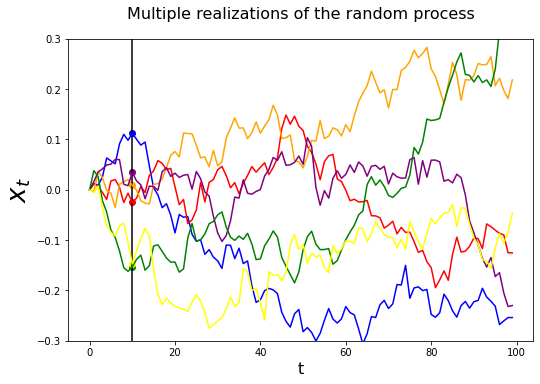

In [145]:
from scipy.stats import norm
from matplotlib import pyplot
import numpy
    
# Generate potting objects
px = 1/pyplot.rcParams['figure.dpi']  # pixel in inches
fig, ax = pyplot.subplots(figsize=(600*px, 400*px))
ax.axvline(x[10],c='black')
for j in range(0, c):
    ax.plot(x,y[j], color=colors[j])
    ax.scatter(x[10], y[j][10], color=colors[j])
ax.set_ylim([-0.3, 0.3])
ax.set_xlabel('t', size=16)
ax.set_ylabel('$x_t$', size=26)
ax.set_title("Multiple realizations of the random process", pad=20, size=16)
pyplot.show()

Because $X_{t=10}$ is a random variable, there is a distribution that describes the probability of realizing the given value of $x_t$ for the given point $t=10$.

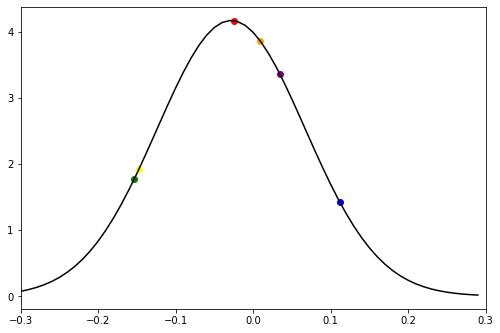

In [182]:
points_x = [x[10] for i in y]
points_y = [i[10] for i in y]
points_mu = numpy.mean(points_y)
points_sigma = numpy.std(points_y)
rv = norm(loc=points_mu, scale=points_sigma)
p_x = numpy.arange(-.3, .3, .01)
p_y = rv.pdf(p_x)

px = 1/pyplot.rcParams['figure.dpi']  # pixel in inches
fig, ax = pyplot.subplots(figsize=(600*px, 400*px))
ax.plot(p_x, p_y, color='black')
for i in range(0, c):
    point_px = y[i][10]
    point_py = rv.pdf(point_px)
    ax.scatter(point_px, point_py, color=colors[i])

ax.set_xlim([-.3,.3])

pyplot.show()

With this mental framework, we can consider each one of these paths (ie. the experiment where we observed the process), as a separate and distinct function. Labeling our graph we can see the distinction.

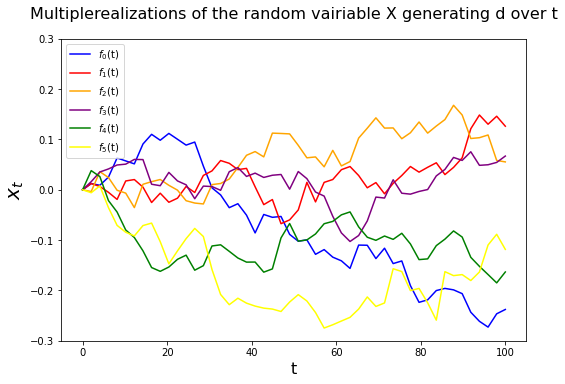

In [121]:
from scipy.stats import norm
from matplotlib import pyplot
import numpy
    
# Generate potting objects
px = 1/pyplot.rcParams['figure.dpi']  # pixel in inches
fig, ax = pyplot.subplots(figsize=(600*px, 400*px))
for j in range(0, c):
    ax.plot(x,y[j],c=colors[j])
ax.set_ylim([-0.3, 0.3])
ax.set_xlabel('t', size=16)
ax.set_ylabel('$x_t$', size=20)
ax.set_title("Multiplerealizations of the random vairiable X generating d over t", pad=20, size=16)
ax.legend(["$f_{0}$(t)".format(i) for i in range(0, c)])
pyplot.show()

So with that being said, we return to the main point. For any value of $t$ we will receive a range of values for $x_t$ which are in turn generated by the set of functions $f_t=\{f_n(t)\}$. We can say that there is a random variable that realizes random functions for each time $t$. Additionally we can say that there exists a distribution that describes the probability of the random variable realizing a function $f_n(t)$ which yields a value of $x_t$ given 𝑡.

**Note:** Like the model of Brownian motion, Gaussian processes are stochastic processes. In fact, the Brownian motion process can be reformulated as a Gaussian process.

https://peterroelants.github.io/posts/gaussian-process-tutorial/

# Gaussian Process

A guassian process is a stochastic process which is characterized by a gaussian distribution

$$ Z_t \sim \mathcal{N}$$

The gaussian distribution is parameterized by two parameters and in our case we will look at the multivariate generalization: 

$$\mathcal{N} := \phi(\mu, \Sigma)$$.

In most cases, we want to use the gaussian process of a way to model our data (We will see more on this in the following section about gaussian process regression). This means that we are not interested in memoryless noise and instead are interested in data that exhibitssome sort of trend. We will restate our process as one which is dependent on another random process:

$$ Z_t : X_t \xrightarrow{\mathcal{N}}Y_t $$

To accomplish this, we can transform the distribution function slightly by replacing constants with functions that consider the process index.

$$ \mu_t := f_\mu(X_t) $$
$$ \Sigma_t := f_\Sigma(Y_t, X_t)$$

$$ Z_t \sim \phi(\mu_t, \Sigma_t)$$

We can then configure the functions so that they maintain the "memory" for out process and consider prior points recursively. In the simple case below we only consider the previous data points. 

We do this using the definition of conditional probabilities and Bayes Theorem. We can construct a mathematical framework to express the probability of the next value given the past values.

$$  P(X_t|X_{t-1}) = \frac{P(X_{t_n}, X_{t-1})}{P(X_{t-1})} $$

Due to the special properties of the joint normal distribution we can algebraically derrive the conditional probability distribution formula:

$$ Z_t \sim \phi(\mu_{Y_t|X_{t-1}}, \Sigma_{Y_t|X_{t-1}})$$

We can then calculate the conditional time dependent expected value $\mu_{X_t|X_{t-1}}$ and variance $\Sigma_{X_t|X_{t-1}}$ using block inversion and the schurs complement. 

Note: This is very hard matrix algebra which I cannot understand/prove yet. I am still reviewing books etc to learn how this is done. For now, we will jump right to the answer:

$$ \mu_{Y_t|X_{t-1}} = \mu_{Y_t}+\Sigma_{2,1}\Sigma_{1,1}^{-1}(Y_{t-1} - \mu_{X_{t-1}}) $$

$$ \Sigma_{Y_t|X_{t-1}} = \Sigma_{1,1}-\Sigma_{1,2}\Sigma_{1,1}^1\Sigma_{1,2} $$

While this is the general answer, we can further simplify these equations given our constraints on the distribution. Specifically, we can impose that the mean is zero:

$$ \mu_{Y_t|X_{t-1}} = \mu_{Y_t}+\Sigma_{2,1}\Sigma_{1,1}^{-1}(Y_{t-1} - \mu_{X_{t-1}}) $$

$$  = 0 +\Sigma_{2,1}\Sigma_{1,1}^{-1}(Y_{t-1} - 0) $$

$$ = \Sigma_{2,1}\Sigma_{1,1}^{-1}Y_{t-1} $$



$$ \mu_{X_t|X_{t-1}} := \begin{bmatrix}  
\mu_{X_t|X_{t-1}} \\
\mu_{X_{t-1}|X_t}
\end{bmatrix}
$$

$$ \Sigma_t := \begin{bmatrix}  
\sigma^2_{X_{t-1}|X_t} & \sigma_{X_{t-1}|X_t} \\
\sigma_{X_t,X_{t-1}} & \sigma^2_{X_{t}|X_{t-1}}
\end{bmatrix}
$$

Expanding our process notation we then have the following constraint which enforces our recursion and providesthe mechonism for our process to have memory.

$$\begin{bmatrix}  
Y_{t-1} \\
Y_t
\end{bmatrix} \sim \mathcal{N} \left( 
\begin{bmatrix}  
\mu_{X_{t-1}} \\
\mu_{X_t}
\end{bmatrix}, 
\begin{bmatrix}  
\sigma^2_{X_{t-1}} & \sigma_{X_{t-1},X_t} \\
\sigma_{X_t,X_{t-1}} & \sigma^2_{X_t}
\end{bmatrix}
\right)
$$


If we run a monte carlo simulation we can realize a random path for our process. Each iteration we would need to calculate the values for the distribution parameters.

Through these functions we have a machanism for adjusting the process as it evolves. We can for example construct a recursive relationship such that the the process is dependent on prior values.

$$ X_t = X_{t - 1} + ??$$

https://peterroelants.github.io/posts/gaussian-process-tutorial/

Consider the Brownian Motion with drift parameter $\mu$ and noise parameter $\sigma$.

$$ \mathcal{W}_t = \mu + \sigma \phi_t $$

[link](https://stats.libretexts.org/Bookshelves/Probability_Theory/Probability_Mathematical_Statistics_and_Stochastic_Processes_(Siegrist)/18%3A_Brownian_Motion/18.04%3A_Geometric_Brownian_Motion#:~:text=The%20stochastic%20process%20X%3D%7BX,%CE%BC%20and%20volatility%20parameter%20%CF%83.&text=Note%20that%20the%20deterministic%20part,decay%2C%20with%20rate%20parameter%20%CE%BC.)

Using this information we calibrate a recursive stochastic process. For example we may start with a random walk


Below we see an example of a random walk which

$$ X_t = \mathcal{W}_t f_t $$

https://www.cs.toronto.edu/~rsalakhu/STAD68/notes/Lecture7_2014.pdf

The recursion of the gaussian process is defined by bayes theorem being slightly adapted to fit the context of a time-dependent process.

$$ P(f|\mathcal{D}) = \frac{P(\mathcal{D}|A)P(A)}{P(\mathcal{D})} $$

https://www.cs.toronto.edu/~rsalakhu/STAD68/notes/Lecture7_2014.pdf

We can create a stochastic regression model which uses the gaussian process and a recursive contraint to calibrate the model so that it fits the data. Iltimately the distribution $\phi$ is derived recursively




We can constructe the recursive relationship so that the next point generated by the process is expressed using the previous point:

$$ Y := \begin{bmatrix} 
y_1 \\ 
y_2 
\end{bmatrix} \sim \mathcal{N}(\mu,  \Sigma) $$

$$ \mu :=  \begin{bmatrix} \mu_1 \\ \mu_2 \end{bmatrix}, \ where \ \mu_i \Rightarrow X_i $$

$$ \Sigma := \begin{bmatrix} 
\sigma^2_1 & \sigma_{1,2} \\
\sigma_{2,1} & \sigma^2_2
\end{bmatrix}, \ where \ \sigma_i \Rightarrow X_i $$

https://peterroelants.github.io/posts/gaussian-process-tutorial/

We can get the conditional distribution to express the probability of $y_2$ given $x_1$, $y_1$, and $x_2$ have occurred

$$ p(y_2 | y1, x1, x2) \sim \mathcal{N}(\mu_{2|1}, \Sigma_{2|1}) $$

** Note sure why: "The gaussian proccess assumes that values within a search space will be most similar bewteen neighboring points. We will see this assumption is enforced as part of the mathematical framework."

-> see covariance commets about kernels

Assume we have a variable or function which depends on a set of parameters:

$$ y = f(X) $$

Assume variable or function is being modeled is a gaussian process:

$$ \hat y \sim \mathcal{N}(\mu, \Sigma) $$

# Gaussian Process Regression

It goes by a few names including:
- krigging
- Wiener–Kolmogorov prediction


## History and Origin
The theoretical basis for the method was developed by the French mathematician Georges Matheron in 1960
His work was based on the Master's thesis of Danie G. Krige who sought to estimate the most likely distribution of gold based on samples from a few boreholes. The term kriging was coined some time after.
https://en.wikipedia.org/wiki/Kriging

## Techniques
Depending on the stochastic properties of the random field and the various degrees of stationarity assumed, different methods for calculating the weights can be deduced, i.e. different types of kriging apply.
https://en.wikipedia.org/wiki/Kriging

## Fig the gp to the data how??
As time goes on, and more observations are recorded, the $\mu$ and $\Sigma$ for the data will be updated (assuming we are modeling a non-trivial process). 

We can construct a joint distribution some how...
https://ekamperi.github.io/mathematics/2021/03/30/gaussian-process-regression.html

## Limitations

- Slow inference. Computing the covariance matrix’s inverse has a O(N3) time complexity, rendering exact inference too slow for more than a few thousand data points.
- Choosing a covariance kernel. There’s some arbitrariness when choosing a kernel. However, the kernel’s hyperparameters can be inferred by maximizing the marginal likelihood, and the whole process can be automated.
- Gaussian processes are in some sense idealizations. For the understanding of extreme phenomena exhibited by real physical systems, non-Gaussian processes might turn out more suitable. In this context, GPs serve as starting points to be perturbed.

https://ekamperi.github.io/mathematics/2021/03/30/gaussian-process-regression.html